# $$用户消费行为分析$$

## 数据基础

### 数据导入清理

导入相关库*斜体* **粗体** ***斜粗体***  [baidu](http://www.baidu.com)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('Solarize_Light2')

导入文件CDNOW_master.txt

In [2]:
data = pd.read_csv('CDNOW_master.txt',names=['用户ID','购买日期','订单数','金额'],sep='\s+')

In [3]:
data.head()

,用户ID,购买日期,订单数,金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
data.describe()

,用户ID,购买日期,订单数,金额
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [5]:
data.isnull().sum()

用户ID    0
购买日期    0
订单数     0
金额      0
dtype: int64

日期转换方式，按月统计

In [6]:
data_date = pd.to_datetime(data['购买日期'],format='%Y%m%d')
data['购买日期'] = data_date
data_month = data_date.values.astype('datetime64[M]')

In [7]:
data_month

array(['1997-01', '1997-01', '1997-01', ..., '1997-03', '1997-03',
       '1997-03'], dtype='datetime64[M]')

In [8]:
data['月份'] = data_month

In [9]:
data

,用户ID,购买日期,订单数,金额,月份
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01
69655,23568,1997-04-22,1,14.99,1997-04-01
69656,23569,1997-03-25,2,25.74,1997-03-01
69657,23570,1997-03-25,3,51.12,1997-03-01


用户总计趋势消费分析

聚合处理，按月进行聚合统计,用户数量，订单数和金额

In [10]:
data_pivot = data.pivot_table(index='月份',
                 values=['用户ID','订单数','金额'],
                 aggfunc={
                     '用户ID':'count',
                     '订单数':'sum',
                     '金额':'sum'
                 })

In [11]:
data_pivot

,用户ID,订单数,金额
月份,,,
1997-01-01,8928,19416,299060.17
1997-02-01,11272,24921,379590.03
1997-03-01,11598,26159,393155.27
1997-04-01,3781,9729,142824.49
1997-05-01,2895,7275,107933.30
1997-06-01,3054,7301,108395.87
1997-07-01,2942,8131,122078.88
1997-08-01,2320,5851,88367.69
1997-09-01,2296,5729,81948.80


每月产生的总订单数

Text(0, 0.5, '订单数')

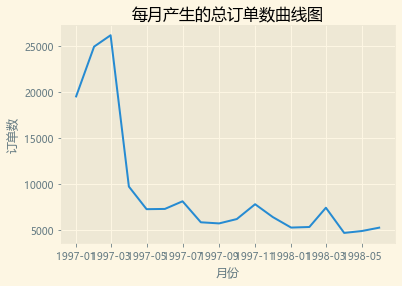

In [12]:
plt.plot(data_pivot['订单数'])
plt.title('每月产生的总订单数曲线图')
plt.xlabel('月份')
plt.ylabel('订单数')

每月产生的总消费金额

Text(0, 0.5, '美元')

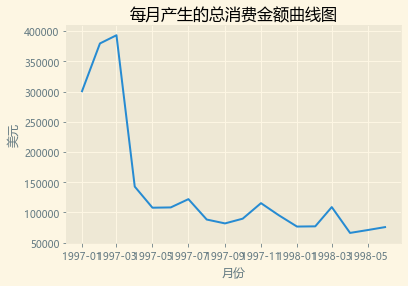

In [13]:
plt.plot(data_pivot['金额'])
plt.title('每月产生的总消费金额曲线图')
plt.xlabel('月份')
plt.ylabel('美元')

每月消费的总人数

Text(0, 0.5, '人')

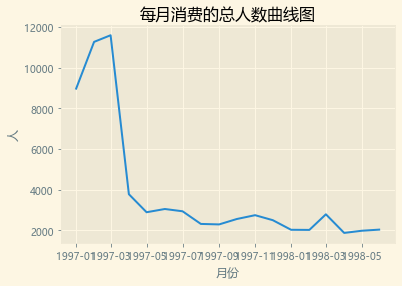

In [14]:
plt.plot(data_pivot['用户ID'])
plt.title('每月消费的总人数曲线图')
plt.xlabel('月份')
plt.ylabel('人')

In [15]:
data_pivot['每月平均每人产生的订单数'] = data_pivot['订单数']/data_pivot['用户ID']

In [16]:
data_pivot

,用户ID,订单数,金额,每月平均每人产生的订单数
月份,,,,
1997-01-01,8928,19416,299060.17,2.174731
1997-02-01,11272,24921,379590.03,2.210877
1997-03-01,11598,26159,393155.27,2.255475
1997-04-01,3781,9729,142824.49,2.573129
1997-05-01,2895,7275,107933.30,2.512953
1997-06-01,3054,7301,108395.87,2.390635
1997-07-01,2942,8131,122078.88,2.763766
1997-08-01,2320,5851,88367.69,2.521983
1997-09-01,2296,5729,81948.80,2.495209


Text(0, 0.5, '订单数')

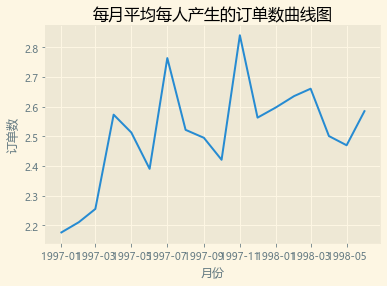

In [17]:
plt.plot(data_pivot['每月平均每人产生的订单数'])
plt.title('每月平均每人产生的订单数曲线图')
plt.xlabel('月份')
plt.ylabel('订单数')

In [18]:
data_pivot['每月平均每人产生的消费金额'] = data_pivot['金额']/data_pivot['用户ID']
data_pivot

,用户ID,订单数,金额,每月平均每人产生的订单数,每月平均每人产生的消费金额
月份,,,,,
1997-01-01,8928,19416,299060.17,2.174731,33.496883
1997-02-01,11272,24921,379590.03,2.210877,33.675482
1997-03-01,11598,26159,393155.27,2.255475,33.898540
1997-04-01,3781,9729,142824.49,2.573129,37.774263
1997-05-01,2895,7275,107933.30,2.512953,37.282660
1997-06-01,3054,7301,108395.87,2.390635,35.493081
1997-07-01,2942,8131,122078.88,2.763766,41.495201
1997-08-01,2320,5851,88367.69,2.521983,38.089522
1997-09-01,2296,5729,81948.80,2.495209,35.691986


Text(0, 0.5, '金额')

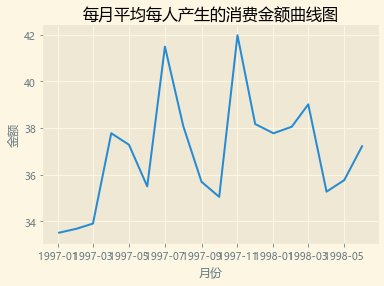

In [19]:
plt.plot(data_pivot['每月平均每人产生的消费金额'])
plt.title('每月平均每人产生的消费金额曲线图')
plt.xlabel('月份')
plt.ylabel('金额')

修改列名

In [20]:
data_pivot.rename(
    columns = {
        '用户ID':'每月消费的总人数',
        '订单数':'每月产生的总订单数',
        '金额':'每月产生的总消费金额'
    },
    inplace = True)

In [21]:
data_pivot

,每月消费的总人数,每月产生的总订单数,每月产生的总消费金额,每月平均每人产生的订单数,每月平均每人产生的消费金额
月份,,,,,
1997-01-01,8928,19416,299060.17,2.174731,33.496883
1997-02-01,11272,24921,379590.03,2.210877,33.675482
1997-03-01,11598,26159,393155.27,2.255475,33.898540
1997-04-01,3781,9729,142824.49,2.573129,37.774263
1997-05-01,2895,7275,107933.30,2.512953,37.282660
1997-06-01,3054,7301,108395.87,2.390635,35.493081
1997-07-01,2942,8131,122078.88,2.763766,41.495201
1997-08-01,2320,5851,88367.69,2.521983,38.089522
1997-09-01,2296,5729,81948.80,2.495209,35.691986


用户个体消费行为分析

In [22]:
data

,用户ID,购买日期,订单数,金额,月份
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01
69655,23568,1997-04-22,1,14.99,1997-04-01
69656,23569,1997-03-25,2,25.74,1997-03-01
69657,23570,1997-03-25,3,51.12,1997-03-01


第一次消费的人数和时间关系图

In [23]:
data_min = data.pivot_table(
        index='用户ID',
    values='购买日期',
    aggfunc={
        '购买日期':'min'
    })

In [24]:
data_min

,购买日期
用户ID,
1,1997-01-01
2,1997-01-12
3,1997-01-02
4,1997-01-01
5,1997-01-01
...,...
23566,1997-03-25
23567,1997-03-25
23568,1997-03-25


统计相同日期下第一次消费的用户人数

In [25]:
data_min['购买日期'].value_counts()

1997-02-08    363
1997-02-24    347
1997-02-04    346
1997-02-06    346
1997-03-04    340
             ... 
1997-01-08    213
1997-03-21    213
1997-01-07    211
1997-01-01    209
1997-01-04    174
Name: 购买日期, Length: 84, dtype: int64

In [26]:
data_min_count = data_min.iloc[:,0].value_counts()

In [27]:
data_min_count

1997-02-08    363
1997-02-24    347
1997-02-04    346
1997-02-06    346
1997-03-04    340
             ... 
1997-01-08    213
1997-03-21    213
1997-01-07    211
1997-01-01    209
1997-01-04    174
Name: 购买日期, Length: 84, dtype: int64

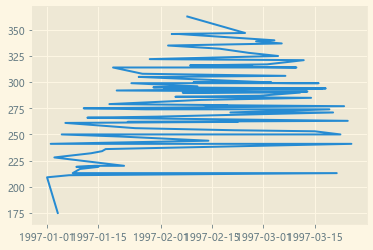

In [28]:
plt.plot(data_min_count)

Text(0, 0.5, '人数')

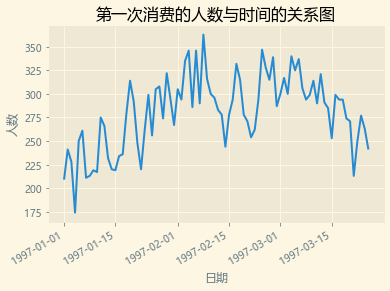

In [29]:
data_min_count.plot()
plt.title('第一次消费的人数与时间的关系图')
plt.xlabel('日期')
plt.ylabel('人数')